# PCA Mirai

## 1. Load the data

In [29]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/mirai/Mirai_dataset.csv', index_col=0, dtype=np.float32)
labels = pd.read_csv('./data/mirai/Mirai_labels.csv', dtype=np.int32)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 764136 entries, 1.0 to 764136.0
Columns: 115 entries, 1.0 to 0.0.54
dtypes: float32(115)
memory usage: 341.0 MB


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764136 entries, 0 to 764135
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       764136 non-null  int32
dtypes: int32(1)
memory usage: 2.9 MB


In [5]:
labels.head(5)

,0
0,0
1,0
2,0
3,0
4,0


In [6]:
labels = labels.rename(columns={'0':'Labels'})
labels.head()

,Labels
0,0
1,0
2,0
3,0
4,0


In [7]:
labels.tail(5)

,Labels
764131,1
764132,1
764133,1
764134,1
764135,1


In [8]:
# get the first row with 1
labels[labels['Labels']>0].iloc[0]

Labels    1
Name: 121620, dtype: int32

In [9]:
data.describe()

,1.0,60.0,0.0,1.0.1,60.0.1,0.0.1,1.0.2,60.0.2,0.0.2,1.0.3,...,0.0.48,0.0.49,0.0.50,1.0.24,60.0.28,0.0.51,60.0.29,0.0.52,0.0.53,0.0.54
count,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,...,7.641360e+05,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,764136.000000,7.641360e+05,764136.000000,764136.000000
mean,62.350761,66.255043,70.099174,89.739113,66.271713,94.559898,240.175995,66.290672,143.849915,2317.251953,...,4.556563e+00,-0.000486,-0.000098,20698.412109,66.377167,0.237334,68.730598,5.130032e+00,0.004659,0.000091
std,44.615818,17.588593,1131.776489,59.838459,16.923904,1343.725586,141.576248,15.456532,1625.711792,1352.537231,...,7.694627e+01,0.649533,0.014717,13575.003906,19.792562,2.114585,23.244699,8.699055e+01,0.634564,0.009265
min,1.000000,42.000004,0.000000,1.000000,42.002373,0.000000,1.000000,44.291508,0.000000,1.000000,...,0.000000e+00,-65.889397,-1.057362,1.000000,42.000000,0.000000,42.000000,0.000000e+00,-73.598526,-0.749841
25%,7.951381,60.024849,0.236595,10.293426,60.051337,0.592575,22.328444,60.097115,1.363975,113.456554,...,1.818989e-12,0.000000,0.000000,158.586109,60.000000,0.000002,60.000000,3.637979e-12,0.000000,0.000000
50%,68.425091,60.078346,0.783348,100.562263,60.110451,1.338655,298.392960,60.135586,1.999527,3127.492188,...,6.366463e-12,0.000000,0.000000,30562.675781,60.000000,0.000004,60.000000,1.682565e-11,0.000000,0.000000
75%,103.520470,60.745066,2.929853,142.195202,60.586356,3.576463,344.376740,61.130436,3.531308,3177.945557,...,1.409717e-11,0.000000,0.000000,30737.931641,60.000000,0.000007,72.000000,4.501999e-11,0.000000,0.000000
max,144.071655,624.117432,442869.250000,195.788055,590.000000,400508.593750,425.179962,590.000000,265238.687500,3282.664307,...,1.455177e+04,92.778946,0.800243,30875.636719,1468.000000,130.141937,1468.000000,1.693692e+04,102.044060,0.875271


In [10]:
# scale the data
scaler = pp.StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)

In [11]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
count,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,...,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05,7.641360e+05
mean,-5.343619e-08,-5.391544e-09,-4.293267e-09,-1.062334e-08,-2.635866e-09,-2.206539e-09,-2.364292e-08,-2.715741e-09,3.516984e-09,2.667816e-08,...,2.376273e-09,1.126983e-09,1.525108e-09,2.603916e-08,-2.787628e-08,-6.130386e-09,-8.786220e-10,-1.543579e-08,1.055844e-09,5.191857e-10
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.375091e+00,-1.379021e+00,-6.193733e-02,-1.482979e+00,-1.434029e+00,-7.037149e-02,-1.689380e+00,-1.423293e+00,-8.848432e-02,-1.712525e+00,...,-5.921752e-02,-1.014405e+02,-7.183786e+01,-1.524672e+00,-1.231634e+00,-1.122367e-01,-1.149966e+00,-5.897234e-02,-1.159903e+02,-8.094161e+01
25%,-1.219285e+00,-3.542172e-01,-6.172828e-02,-1.327670e+00,-3.675503e-01,-6.993049e-02,-1.538730e+00,-4.007081e-01,-8.764531e-02,-1.629380e+00,...,-5.921752e-02,7.488515e-04,6.670410e-03,-1.513063e+00,-3.222005e-01,-1.122358e-01,-3.755956e-01,-5.897234e-02,-7.342549e-03,-9.805739e-03
50%,1.361475e-01,-3.511756e-01,-6.124519e-02,1.808729e-01,-3.640574e-01,-6.937526e-02,4.112059e-01,-3.982191e-01,-8.725437e-02,5.990526e-01,...,-5.921752e-02,7.488515e-04,6.670410e-03,7.266496e-01,-3.222005e-01,-1.122347e-01,-3.755956e-01,-5.897234e-02,-7.342549e-03,-9.805739e-03
75%,9.227610e-01,-3.132693e-01,-5.934861e-02,8.766288e-01,-3.359371e-01,-6.770988e-02,7.360048e-01,-3.338547e-01,-8.631215e-02,6.363553e-01,...,-5.921752e-02,7.488515e-04,6.670410e-03,7.395598e-01,-3.222005e-01,-1.122335e-01,1.406515e-01,-5.897234e-02,-7.342549e-03,-9.805739e-03
max,1.831659e+00,3.171731e+01,3.912428e+02,1.772255e+00,3.094608e+01,2.979881e+02,1.306745e+00,3.388274e+01,1.630640e+02,7.137793e-01,...,1.890569e+02,1.428403e+02,5.438078e+01,7.497038e-01,7.081567e+01,6.143271e+01,6.019740e+01,1.946396e+02,1.608025e+02,9.445989e+01


## 2. Create Train-Test Data

In [12]:
# create train np array
n_index = 500000
train =data.values[:n_index]
train.shape

(500000, 115)

## 3. Apply PCA

In [13]:
# create and fit pca
pca = PCA(n_components=25)
pca.fit(train)
train_pca = pca.transform(train)

In [14]:
inverse_pca = pca.inverse_transform(train_pca)

In [15]:
def reconstr_error(original, reconstr):
    errors = np.sqrt(np.sum((original - reconstr)**2, axis=1))
    return errors

In [16]:
# errors = np.sqrt(np.sum((train - inverse_pca)**2, axis=1))
errors = reconstr_error(train, inverse_pca)

In [17]:
df_errors = pd.DataFrame(errors)
df_errors.head()

,0
0,1.115032
1,1.210041
2,29.111221
3,1.120686
4,0.902660


In [18]:
mean_error = errors.mean()
print(mean_error)

1.3110042


In [19]:
# average precision score for train results
y_true = labels[:n_index]
aps = average_precision_score(y_true, errors)
print('Average precision score: ', aps)

Average precision score:  0.598934213456859


## 4. Test PCA

In [20]:
# apply pca to test data
test = data.values[n_index:]
test.shape

(264136, 115)

In [21]:
test_pca = pca.transform(test)

In [22]:
inverse_test = pca.inverse_transform(test_pca)

In [23]:
# test_errors = np.sqrt(np.sum((test - inverse_test)**2, axis=1))
test_errors = reconstr_error(test, inverse_test)
print('Average errors: ', test_errors.mean())

Average errors:  0.74346614


In [24]:
# average precision score for test results
y_true = labels[n_index:]
aps = average_precision_score(y_true, test_errors)
print('Average precision score: ', aps)

Average precision score:  1.0000000000000002


## 5.Precision-Recall Curve

In [25]:
# precision-recall curve for test results
precision, recall, thresholds = precision_recall_curve(y_true, test_errors)

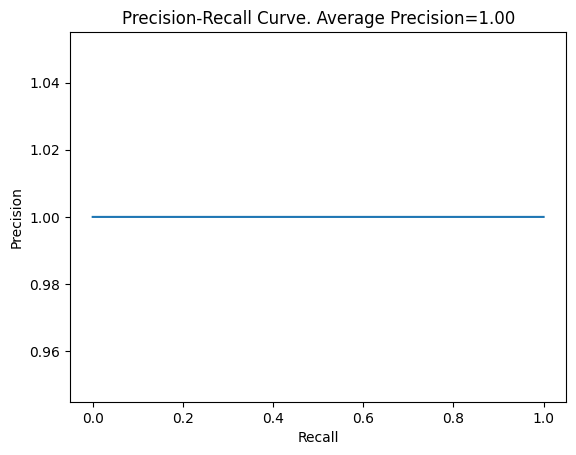

In [33]:
plt.title('Precision-Recall Curve. Average Precision={0:0.2f}'.format(aps))
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.ylim([0, 1.1])
#plt.xlim([0, 1.0])
plt.plot(recall, precision)
plt.show()

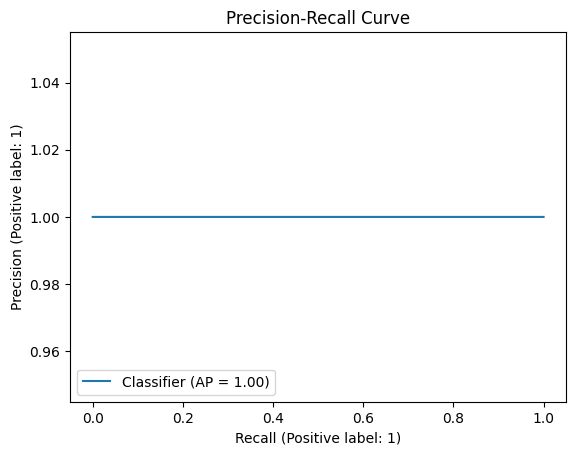

In [27]:
display = PrecisionRecallDisplay.from_predictions(y_true, test_errors)
_ = display.ax_.set_title("Precision-Recall Curve")

## 6. Receiver Operational Characteristic (ROC)

In [30]:
fpr, tpr, thresholds = roc_curve(y_true, test_errors)

/home/alex/MySci/anomaly/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1009: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


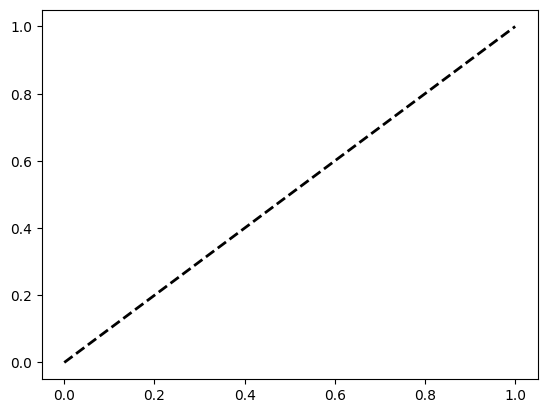

In [32]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0,1], [0,1], color='k', lw=2, linestyle='--')
plt.show()